In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import klib as k
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('TV_Sales.csv')
data.head()

,TV,Sales
0,16.0,54.732757
1,13.0,46.677897
2,41.0,150.177829
3,83.0,298.246340
4,15.0,56.594181


In [6]:
data.tail()

,TV,Sales
4567,26.0,94.685866
4568,71.0,249.101915
4569,44.0,163.631457
4570,71.0,253.610411
4571,42.0,148.202414


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      4562 non-null   float64
 1   Sales   4566 non-null   float64
dtypes: float64(2)
memory usage: 71.6 KB


In [5]:
data.isnull().mean()*100

TV       0.218723
Sales    0.131234
dtype: float64

In [7]:
data.isnull().sum()

TV       10
Sales     6
dtype: int64

In [8]:
data.dropna(inplace=True)

In [10]:
data.isnull().sum()

TV       0
Sales    0
dtype: int64

In [12]:
x = data[['TV']].values
x

array([[16.],
       [13.],
       [41.],
       ...,
       [44.],
       [71.],
       [42.]])

In [15]:
y = data[['Sales']].values
y

array([[ 54.73275715],
       [ 46.67789698],
       [150.1778288 ],
       ...,
       [163.6314574 ],
       [253.6104113 ],
       [148.2024141 ]])

In [16]:
sc = StandardScaler()

In [17]:
x = sc.fit_transform(x)
x

array([[-1.45775911],
       [-1.57263965],
       [-0.50042125],
       ...,
       [-0.38554071],
       [ 0.64838417],
       [-0.46212774]])

In [18]:
y

array([[ 54.73275715],
       [ 46.67789698],
       [150.1778288 ],
       ...,
       [163.6314574 ],
       [253.6104113 ],
       [148.2024141 ]])

In [19]:
x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.3, random_state=0)

In [20]:
model=LinearRegression()

In [22]:
model.fit(x_train,y_train)

LinearRegression()

In [23]:
model.coef_

array([[92.97063759]])

In [24]:
model.intercept_

array([192.42509644])

In [25]:
testing_score = model.score(x_test,y_test)*100
testing_score

99.89979620257489

In [26]:
training_score =model.score(x_train,y_train)*100
training_score

99.8993620848101

In [27]:
R2_score =r2_score(y_test,model.predict(x_test))
R2_score

0.9989979620257489

In [28]:
mean = mean_absolute_error(y_test,model.predict(x_test))
mean

2.36368480689264

In [29]:
mse = mean_squared_error(y_test,model.predict(x_test))
mse

8.681038343693267

In [31]:
y_predict=model.predict(x)
y_predict

array([[ 56.89630296],
       [ 46.21578572],
       [145.9006133 ],
       ...,
       [156.58113054],
       [252.70578571],
       [149.46078571]])

In [33]:
output=pd.DataFrame(zip(y,y_predict),columns=("ACTUAL","PREDICTED"),dtype=float)
output.head()

,ACTUAL,PREDICTED
0,54.732757,56.896303
1,46.677897,46.215786
2,150.177829,145.900613
3,298.246340,295.427855
4,56.594181,53.336131


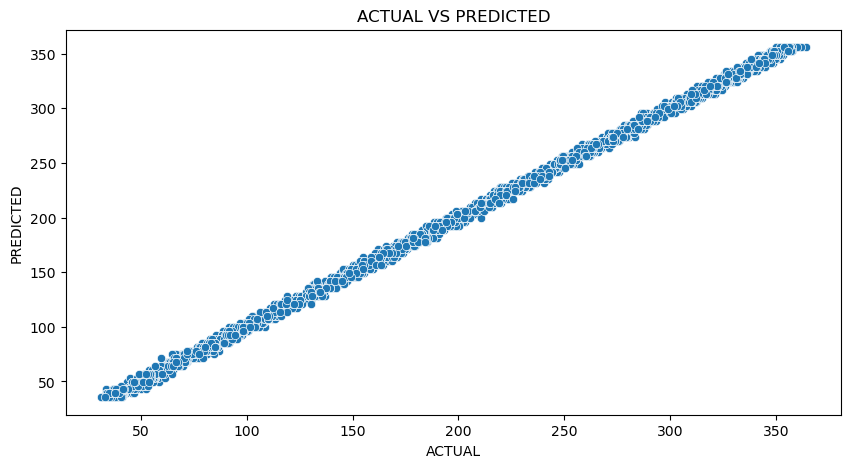

In [36]:
plt.figure(figsize=(10,5))
plt.title("ACTUAL VS PREDICTED")
plt.xticks()
sns.scatterplot(data=output,x="ACTUAL",y="PREDICTED");

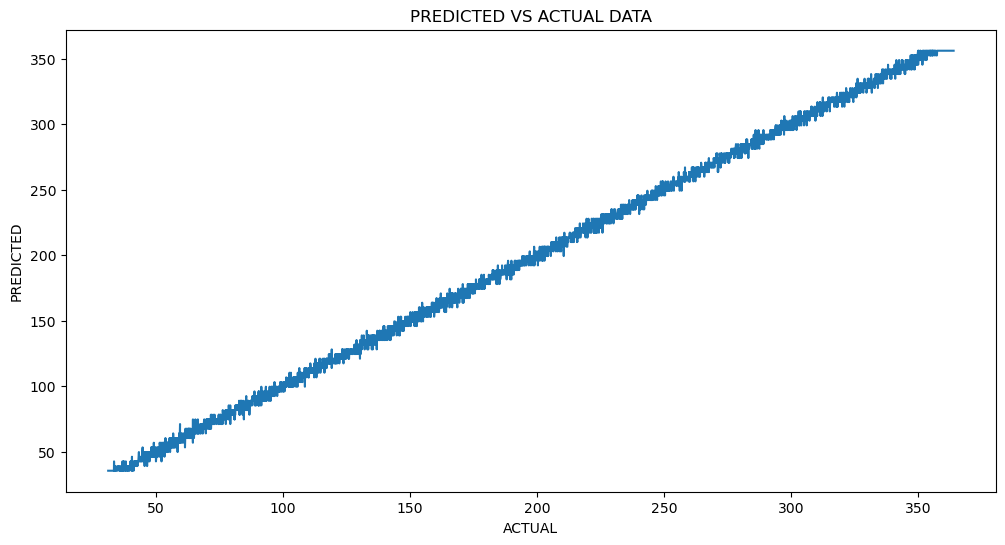

In [38]:
plt.figure(figsize=(12,6))
plt.title("PREDICTED VS ACTUAL DATA")
sns.lineplot(data=output, x="ACTUAL",y="PREDICTED");